In [1]:
## Imports
import numpy as np
import os
import tensorflow as tf

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from os import listdir
from PIL import Image
from matplotlib.image import imread

import seaborn as sns
import random

from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,BatchNormalization,MaxPool2D,Flatten,Dropout

In [2]:
### Data Directory 

data_dir = "C:\\Users\\abhin\\Downloads\\Image Dataset\\Pokemon Detection\\pokemoncv\\"

### Listsing Data
listdir(data_dir)

['Label_Name.csv', 'Test', 'Train']

In [3]:
### Reading Labels 
Labels = pd.read_csv(data_dir+'Label_Name.csv')

In [10]:
Labels = Labels.to_dict()['Pokemon_Name']

In [11]:
## Test path 
test_path = data_dir+'Test\\Test_Images\\'
## Train Path
train_path = data_dir+'Train\\Train_Images\\'

path:  C:\Users\abhin\Downloads\Image Dataset\Pokemon Detection\pokemoncv\Train\Train_Images\0552cd4a9ba64c11893716f67108f8a5.jpg
Dimensions: (378, 375, 3)


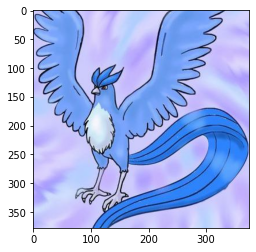

In [13]:
## read Image 

pokemon = train_path+os.listdir(train_path)[77]

print("path: ",pokemon)

print("Dimensions:",(plt.imread(pokemon)).shape)

plt.imshow(imread(pokemon))

In [14]:
## Size of Data

print("Train Data :" , len(listdir(train_path)))

print("Test Data :" , len(listdir(test_path)))

Train Data : 1797
Test Data : 436


In [15]:
### Reading the dimesions of Train size 

dim1 = []

dim2 = []

bad_image = []


for image in listdir(train_path):
    try:
        img = Image.open(train_path+image)
        img.verify()     # to verfy if its an img
        img.close()     #to close img and free memory space
    
        img = plt.imread(train_path+image)   ### Reading the image 
        d1,d2,colors = img.shape             ### Storing the dimensions
        dim1.append(d1)                      ## Storing dimension 1
        dim2.append(d2)                       ## Storing dimension 2
    except (IOError, SyntaxError) as e:
        print('Bad file:', image)
        bad_image.append(image)

Bad file: 00000044.png
Bad file: 00000055.png
Bad file: 200010472.png
Bad file: 200010481.png


In [16]:
### Lenghth of images for training  + image discareded == Total images in train
len(dim1) + len(bad_image) == len(listdir(train_path))

True

In [17]:
### Labels 
Labels

## Train Labels

train_labels = pd.read_csv(data_dir+"Train\\Train_Data_Labels.csv")

In [18]:
Labels

{0: 'Articuno',
 1: 'Blastoise',
 2: 'Charmander',
 3: 'Charmeleon',
 4: 'Cloyster',
 5: 'Gastly',
 6: 'Gengar',
 7: 'Gloom',
 8: 'Golbat',
 9: 'Golem',
 10: 'Haunter',
 11: 'Horsea',
 12: 'Jigglypuff',
 13: 'Jolteon',
 14: 'Jynx',
 15: 'Kabuto',
 16: 'Kangaskhan',
 17: 'Koffing',
 18: 'Lapras',
 19: 'Machamp',
 20: 'Mankey',
 21: 'Metapod',
 22: 'Mew',
 23: 'Mewtwo',
 24: 'Nidoking',
 25: 'Nidoqueen',
 26: 'Nidorino',
 27: 'Oddish',
 28: 'Omanyte',
 29: 'Omastar',
 30: 'Pidgey',
 31: 'Pikachu',
 32: 'Pinsir',
 33: 'Poliwag',
 34: 'Primeape',
 35: 'Psyduck',
 36: 'Raichu',
 37: 'Rapidash',
 38: 'Starmie',
 39: 'Vaporeon',
 40: 'Venomoth',
 41: 'Venusaur',
 42: 'Victreebel',
 43: 'Vileplume',
 44: 'Voltorb',
 45: 'Vulpix',
 46: 'Weedle',
 47: 'Weezing',
 48: 'Wigglytuff',
 49: 'Zapdos'}

In [19]:
train_labels

,FileName,Label
0,00000011.png,31.0
1,962696ee8df246c1b4157ba5e8b1529c.jpg,26.0
2,98eab0a1af5043d4b33f4cecf73e48dc.jpg,37.0
3,6c22904780ce4b93b700ea17d7e46746.jpg,16.0
4,51fc29cf72494fc78db5e31539b60729.jpg,14.0
...,...,...
1792,8fbc52e65bdb4c768d037af33d947d53.jpg,11.0
1793,1058c2e931134387a008512071057a77.jpg,38.0
1794,905527f5dd374fbe8086a51c85d31587.jpg,16.0
1795,7c870a2696754f1f810bc11ad103756c.jpg,44.0


In [20]:
## forming y_train label
y=[]
for img in listdir(train_path):
    if img in bad_image:
        pass
    else:
        y.append(train_labels[train_labels['FileName']==img]['Label'].values[0])

In [21]:
y

[2.0,
 31.0,
 23.0,
 31.0,
 2.0,
 2.0,
 23.0,
 2.0,
 23.0,
 23.0,
 31.0,
 23.0,
 2.0,
 31.0,
 23.0,
 31.0,
 31.0,
 2.0,
 31.0,
 23.0,
 31.0,
 2.0,
 23.0,
 31.0,
 23.0,
 31.0,
 31.0,
 23.0,
 2.0,
 31.0,
 23.0,
 2.0,
 31.0,
 2.0,
 23.0,
 23.0,
 2.0,
 2.0,
 31.0,
 31.0,
 23.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 40.0,
 27.0,
 21.0,
 27.0,
 11.0,
 14.0,
 22.0,
 31.0,
 35.0,
 13.0,
 13.0,
 10.0,
 21.0,
 21.0,
 36.0,
 11.0,
 49.0,
 21.0,
 37.0,
 26.0,
 18.0,
 27.0,
 26.0,
 48.0,
 20.0,
 15.0,
 8.0,
 27.0,
 20.0,
 0.0,
 14.0,
 44.0,
 8.0,
 13.0,
 14.0,
 31.0,
 20.0,
 38.0,
 9.0,
 38.0,
 33.0,
 17.0,
 19.0,
 23.0,
 14.0,
 16.0,
 22.0,
 23.0,
 45.0,
 20.0,
 43.0,
 35.0,
 41.0,
 11.0,
 22.0,
 32.0,
 10.0,
 4.0,
 15.0,
 36.0,
 32.0,
 34.0,
 13.0,
 23.0,
 36.0,
 2.0,
 27.0,
 21.0,
 8.0,
 40.0,
 41.0,
 44.0,
 22.0,
 45.0,
 4.0,
 0.0,
 25.0,
 24.0,
 4.0,
 14.0,
 14.0,
 31.0,
 26.0,
 32.0,
 44.0,
 30.0,
 16.0,
 28.0,
 29.0,
 2.0,
 34.0,
 15.0,
 16.0,
 24.0,
 3.0,
 36.0,
 31.0,
 2.0,
 45.0,
 8.0,
 38.

In [24]:
##

y[0]

2.0

In [26]:
np.shape(y)

(1793,)

In [27]:
y = np.array(y)

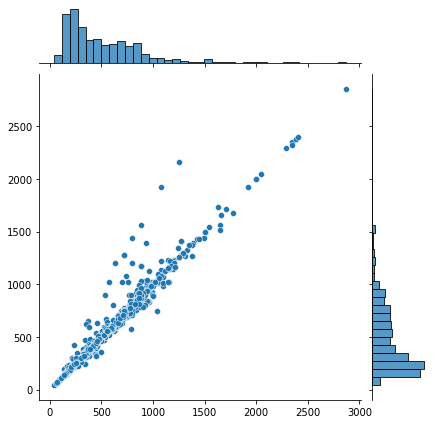

In [28]:
### Visualizing Dimensions of the train images

sns.jointplot(x=dim1,y=dim2)

In [29]:
## Verify y Label

len(y) == len(dim1)

True

In [30]:
np.mean(dim1)

490.23201338538763

In [31]:
np.mean(dim2)

495.7473508087005

In [32]:
np.mean(([np.mean(dim1),np.mean(dim2)]))

492.98968209704407

In [33]:
### resizing images to add uniformity in shape
image_shape = (64,64,3)

In [35]:
### Loading Image Data Set

## necessary imports 
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split


In [36]:
### loading data

X=[]
for i in listdir(train_path):
    if i in bad_image:
        pass
    else:
        img = image.load_img(train_path+i,target_size=image_shape)
        img = image.img_to_array(img)
        img = img/255
        X.append(img)
        
X = np.array(X)

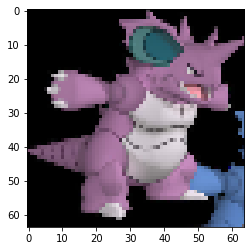

In [49]:
n = np.random.randint(low=0,high=len(y))
plt.imshow(X[n])

In [92]:
y = pd.get_dummies(y)
y = np.array(y)

In [93]:
### Shapes of X and Y 


print("X :",X.shape)

print("\nY :", y.shape)

X : (1793, 64, 64, 3)

Y : (1793, 50)


In [94]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [95]:
### Bulding A CNN 

In [170]:
## Defining Model
model = tf.keras.Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape= X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

In [171]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_19 (Batc (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
batch_normalization_20 (Batc (None, 29, 29, 64)        256       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 64)      

In [172]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [173]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [174]:
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
45/45 [==============================] - 4s 35ms/step - loss: 4.0793 - accuracy: 0.0223 - val_loss: 1.7356 - val_accuracy: 0.0223
Epoch 2/100
45/45 [==============================] - 1s 16ms/step - loss: 3.6701 - accuracy: 0.0160 - val_loss: 4.4724 - val_accuracy: 0.0195
Epoch 3/100
45/45 [==============================] - 1s 16ms/step - loss: 3.4580 - accuracy: 0.0237 - val_loss: 6.7773 - val_accuracy: 0.0251
Epoch 4/100
45/45 [==============================] - 1s 16ms/step - loss: 3.3522 - accuracy: 0.0209 - val_loss: 9.4983 - val_accuracy: 0.0390
Epoch 5/100
45/45 [==============================] - ETA: 0s - loss: 3.2323 - accuracy: 0.02 - 1s 15ms/step - loss: 3.2323 - accuracy: 0.0223 - val_loss: 9.0405 - val_accuracy: 0.0474
Epoch 6/100
45/45 [==============================] - 1s 16ms/step - loss: 3.0873 - accuracy: 0.0174 - val_loss: 8.8192 - val_accuracy: 0.0418
Epoch 7/100
45/45 [==============================] - 1s 16ms/step - loss: 2.8777 - accuracy: 0.0279 - val_

45/45 [==============================] - 1s 12ms/step - loss: 0.4775 - accuracy: 0.0321 - val_loss: 0.8838 - val_accuracy: 0.0000e+00
Epoch 59/100
45/45 [==============================] - 1s 12ms/step - loss: 0.4818 - accuracy: 0.0265 - val_loss: 1.0839 - val_accuracy: 0.0028
Epoch 60/100
45/45 [==============================] - 1s 12ms/step - loss: 0.4641 - accuracy: 0.0230 - val_loss: 0.7182 - val_accuracy: 0.0028
Epoch 61/100
45/45 [==============================] - 1s 12ms/step - loss: 0.4515 - accuracy: 0.0195 - val_loss: 0.5719 - val_accuracy: 0.0084
Epoch 62/100
45/45 [==============================] - 1s 12ms/step - loss: 0.4322 - accuracy: 0.0300 - val_loss: 0.5635 - val_accuracy: 0.0111
Epoch 63/100
45/45 [==============================] - 1s 12ms/step - loss: 0.4193 - accuracy: 0.0272 - val_loss: 0.5405 - val_accuracy: 0.0167
Epoch 64/100
45/45 [==============================] - 1s 12ms/step - loss: 0.4013 - accuracy: 0.0349 - val_loss: 0.5155 - val_accuracy: 0.0418
Epoch 65

12/12 - 0s - loss: 0.4624 - accuracy: 0.0139


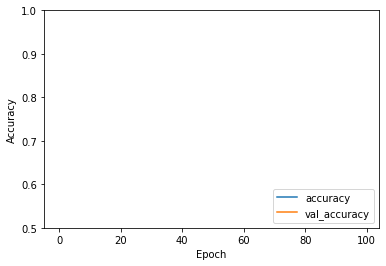

In [175]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [176]:
print(test_acc)

0.013927577063441277


In [179]:
history = pd.DataFrame(history.history)

<AxesSubplot:>

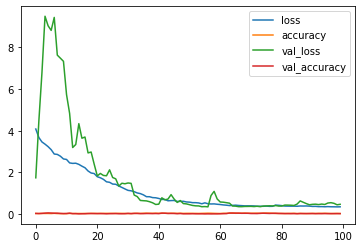

In [180]:
history.plot()